# MA3J8 Approximation Theory and Applications 

## 08a - Multivariate Approximation: PDEs

In [2]:
using FFTW, ForwardDiff, PyPlot, ApproxFun, DifferentialEquations, LinearAlgebra
using Plots; plotlyjs()

┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/ForwardDiff/k0ETY.ji for ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/ApproxFun/jGqLz.ji for ApproxFun [28f2ccd6-bb30-5033-b560-165f7b14dc2f]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Bas

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/68ecdb798f4eb9ea83855e159827d5a315abd911-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/68ecdb798f4eb9ea83855e159827d5a315abd911-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/ORCA/jvX7k.ji for ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1184


Plots.PlotlyJSBackend()

### 08-1 Fourier Spectral Methods

We will solve a simple problem:
$$
 - \Delta u + c^2 u = f, \qquad u(x+2\pi e_i) = u(x)
$$
We use a tensor product trigonometric basis (similar as in the 1D case we need to be careful about aliasing and identify the first and last grid points in each coordinate direction; we will write $e^{iNx_\alpha}$ for these functions for simplicity of notation, but we mean $\cos(N x_\alpha)$.)
$$
u({\bf x}) = \sum_{{\bf k} \in \{-N+1,\dots,N} \widehat{u}_{\bf k} e^{i {\bf k} \cdot {\bf x}}
$$
The equation transforms as follows, 
$$
 |k|^2 \widehat{u}_k + c^2 \widehat{u}_k = \widehat{f}_k,
$$
and hence 
$$
   \widehat{u}_k = \frac{\widehat{f}_k}{c^2 + |k|^2}
$$
For the approximation scheme, we will replace $f$ with its trigonometric interpolant and then solve the above equation explicitly.

In [3]:
# grid parameters: 2π x 2π
N = 2^7          # number of grid points 
h = 2*π/N        # mesh spacing 
# model parameters 
c = 1.0
f(x,y) = exp(sin(x)*cos(2*y)+0.2*sin(x+y))

# real-space grid 
x = range(h, 2*π, length=N)
Xx = kron(x, ones(N)')
Xy = Xx'
# reciprocal-space grid
k = collect([0:N/2; -N/2+1:-1])
Kx = kron(k, ones(N)')
Ky = Kx'

# trigonometric interpolant of f
F = f.(Xx, Xy)
F̂ = fft(F)   # this is a 2D tensor-product FFT! 
Û = F̂ ./ (c^2 .+ Kx.^2 + Ky.^2) 
U = real.(ifft(Û))

# plot the solution 
Plots.surface(x, x, U)


WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/e9d425328f300b95152ee3bb2b1b10d4e54933ef-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/17a36bb823b1e157541bc72d148123bb00ec9b2c-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_05","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_06","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_06","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-a8732a07-4637-41e5-976b-d9abcad31fa8"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_01","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_01","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_02","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_02","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_04","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-29e7a945-ccd1-43de-a7df-7c3f878c3751","id":"ob_03","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_08","value":{}},"hover":{"sync":false,"id":"ob_01","value":{}},"selected":{"sync":false,"id":"ob_02","value":{}},"__gd_contents":{"sync":false,"id":"ob_06","value":{}},"click":{"sync":false,"id":"ob_03","value":{}},"image":{"sync":true,"id":"ob_05","value":""},"__get_gd_contents":{"sync":false,"id":"ob_10","value":""},"_downloadImage":{"sync":false,"id":"ob_09","value":{}},"relayout":{"sync":false,"id":"ob_04","value":{}},"_commands":{"sync":false,"id":"ob_07","value":["relayout",{"showlegend":true,"paper_bgcolor":"rgba(255, 255, 255, 1.000)","annotations":[],"height":400,"margin":{"l":0,"b":20,"r":0,"t":20},"plot_bgc

In [4]:
# or as a surface
Plots.contour(x, x, U, fill=true)

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/e9d425328f300b95152ee3bb2b1b10d4e54933ef-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/17a36bb823b1e157541bc72d148123bb00ec9b2c-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_15","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_16","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_16","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-4072046e-a995-4e43-9734-26a060bdf8b9"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_11","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_11","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_12","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_12","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_14","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-fba0fc4b-8fca-4b43-b9b2-5e9b50542738","id":"ob_13","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_18","value":{}},"hover":{"sync":false,"id":"ob_11","value":{}},"selected":{"sync":false,"id":"ob_12","value":{}},"__gd_contents":{"sync":false,"id":"ob_16","value":{}},"click":{"sync":false,"id":"ob_13","value":{}},"image":{"sync":true,"id":"ob_15","value":""},"__get_gd_contents":{"sync":false,"id":"ob_20","value":""},"_downloadImage":{"sync":false,"id":"ob_19","value":{}},"relayout":{"sync":false,"id":"ob_14","value":{}},"_commands":{"sync":false,"id":"ob_17","value":["relayout",{"showlegend":true,"xaxis":{"showticklabels":true,"gridwidth":0.5,"tickvals":[1.0,2.0,3.0,4.0,5.0,6.0],"visible":true,"ticks":"inside","rang

Next, we solve a nonlinear evolution equation: the Cahn--Hilliard equation, 
$$ (-\Delta)^{-1} u_t = \epsilon \Delta u - \frac{1}{\epsilon} (u^3 - u) $$
The difficulty here is that a trivial semi-implicit time discretisation
$$
   u^{(n+1)} + \epsilon \tau \Delta^2 u^{(n+1)} = u^{(n)} + \frac{\tau}{\epsilon} \Delta (u^3 - u)
$$
has time-step restriction $O( \epsilon h^2 )$. We can stabilise with a (local) convex-concave splitting such as
$$
   (1 + \epsilon \tau \Delta^2 - C \tau \Delta) u^{(n+1)} 
    = (1-C \tau \Delta) u^{(n)} + \frac{\tau}{\epsilon} \Delta (u^3 - u)^{(n)}.
$$
Since $(u^3-u)' = 3 u^2 - 1 \in [-1, 2]$ so we need $C \geq 2/\epsilon$ to get $\tau$-independent stability. We then choose the time-step $\tau = h \epsilon$ to make up for the loss of accuracy.

In reciprocal space, the time step equation becomes
$$
  (1+\epsilon \tau |k|^4 + C \tau |k|^2) \hat{u}^{(n+1)} = \big(1+C\tau |k|^2 + \frac{\tau}{\epsilon} |k|^2\big) \hat{u}^{(n)} - \frac{\tau}{\epsilon} |k|^2 (\widehat{u^3})^{(n)}
$$

(For something more serious we should probably implement a decent adaptive time-stepping strategy.)

In [17]:
# grid parameters: 2π x 2π
N = 2^7          # number of grid points 
h = 2*π/N        # mesh spacing 
# model parameters 
ϵ = h * 3        # interface thickness 
C = 2/ϵ          # stabilisation parameter
τ = ϵ * h        # time-step 
Tfinal = 8       # final time 

# real-space and reciprocal-space grids
x = range(h, 2*π, length=N)
k = collect([0:N/2; -N/2+1:-1])
# Δ multiplier
Δ = -kron(k.^2, ones(N)') .- kron(ones(N), k'.^2)

# initial condition
u = rand(N, N)  .- 0.5

# time-stepping loop
@gif for n = 1:ceil(Tfinal / τ)
    global u 
    f̂ =  (1 .- C*τ*Δ) .* fft(u) + τ/ϵ * (Δ .* fft(u.^3-u))
    u = real(ifft( f̂ ./ (1 .+ ϵ*τ*Δ.^2 - C*τ*Δ) ))
    Plots.contour(x, x, u, fill=true, clims=[-1,1], color=:pu_or)
end every 3

┌ Info: Saved animation to 
│   fn = /Users/ortner/gits/MA3J8ApxThyApp/jl/tmp.gif
└ @ Plots /Users/ortner/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/ortner/gits/MA3J8ApxThyApp/jl/tmp.gif")

### 08-2 Chebyshev Spectral Methods

Solving BVPs with Chebyshev spectral methods is more involved, that reason being that $T_n'$ is no longer proportional to $T_n$ as in the trigonometric setting. Using $T_k(\cos x) = \cos(k x)$ we can compute 
$$
    T_k'(x)  = k \sin(k x) / \sin(x) = k U_{k-1}(x),
$$
where $U_k(x)$ are called the Chebyshev polynomials of the second kind. They are for example defined by the recursion 
$$
   U_{k+1}(x) = 2 x U_k(x) - U_{k-1}(x), \quad U_0 = 1, U_1(x) = 2x.
$$

Thus, differentiating a function represented in the Chebyshev basis transforms it into a different basis. A numerically stable and computationally efficient spectral methods requires careful managing these transformations. This is a non-trivial and fairly recent technology that has been implemented in the `ApproxFun.jl` package, which we will use in the following.

Our first example is Laplace's equation 
$$
 - \Delta u = 0, \qquad u|_\Omega = g
$$

In [20]:
Ω = (-1.0 .. 1.0)^2
g = Fun((x,y) -> cos(3.1*(x-0.3)*y), ∂(Ω))  # boundary data
Δ = Laplacian(Ω)
u = \([Dirichlet(Ω); Δ], [g; 0]; tolerance=1e-4)
Plots.surface(u; zlims=[-1.5,1.5])

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/e9d425328f300b95152ee3bb2b1b10d4e54933ef-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/17a36bb823b1e157541bc72d148123bb00ec9b2c-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11135","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11136","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11136","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-6a7ca958-56cd-4bcd-97a6-8cb9a3b02be5"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11131","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11131","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11132","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11132","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11134","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-e970a9e6-473b-44f7-a318-7d686b2c3f73","id":"ob_11133","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_11138","value":{}},"hover":{"sync":false,"id":"ob_11131","value":{}},"selected":{"sync":false,"id":"ob_11132","value":{}},"__gd_contents":{"sync":false,"id":"ob_11136","value":{}},"click":{"sync":false,"id":"ob_11133","value":{}},"image":{"sync":true,"id":"ob_11135","value":""},"__get_gd_contents":{"sync":false,"id":"ob_11140","value":""},"_downloadImage":{"sync":false,"id":"ob_11139","value":{}},"relayout":{"sync":false,"id":"ob_11134","value":{}},"_commands":{"sync":false,"id":"ob_11137","value":["relayout",{"showlegend":true,"paper_bgcolor":"rgba(255, 255, 255, 1.000)","annotations":[],"h

In [21]:
# or plotted as a contour
Plots.contour(u; fill=true)

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/e9d425328f300b95152ee3bb2b1b10d4e54933ef-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/17a36bb823b1e157541bc72d148123bb00ec9b2c-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11145","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11146","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11146","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-78ed4557-1f71-4806-b5a8-39a8ade75941"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11141","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11141","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11142","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11142","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11144","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-a7c1dafc-ecd9-4617-bd26-f38936643fca","id":"ob_11143","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_11148","value":{}},"hover":{"sync":false,"id":"ob_11141","value":{}},"selected":{"sync":false,"id":"ob_11142","value":{}},"__gd_contents":{"sync":false,"id":"ob_11146","value":{}},"click":{"sync":false,"id":"ob_11143","value":{}},"image":{"sync":true,"id":"ob_11145","value":""},"__get_gd_contents":{"sync":false,"id":"ob_11150","value":""},"_downloadImage":{"sync":false,"id":"ob_11149","value":{}},"relayout":{"sync":false,"id":"ob_11144","value":{}},"_commands":{"sync":false,"id":"ob_11147","value":["relayout",{"showlegend":true,"xaxis":{"showticklabels":true,"gridwidth":0.5,"tickvals":[-0.75

A more difficult equation of a similar type is the Helmholtz equation, 
$$
u_{xx} + u_{yy} + 100u=0, \qquad u|_{\partial \Omega}=1
$$

In [35]:
Ω = (-1.0..1.0)^2
Δ = Laplacian(Ω)
@time u = \([Dirichlet(Ω);Δ+500*I], [ones(∂(Ω));0]; tolerance=1E-6)
Plots.contour(u, fill=true)

  4.335565 seconds (57.56 M allocations: 1.436 GiB, 16.35% gc time)


WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/e9d425328f300b95152ee3bb2b1b10d4e54933ef-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/17a36bb823b1e157541bc72d148123bb00ec9b2c-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11265","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11266","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11266","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-25c4024d-5a08-4fdb-a322-85a283c1dc0e"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11261","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11261","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11262","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11262","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11264","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-535877f6-a4a6-4d83-aa9d-e7a7d64d7f15","id":"ob_11263","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_11268","value":{}},"hover":{"sync":false,"id":"ob_11261","value":{}},"selected":{"sync":false,"id":"ob_11262","value":{}},"__gd_contents":{"sync":false,"id":"ob_11266","value":{}},"click":{"sync":false,"id":"ob_11263","value":{}},"image":{"sync":true,"id":"ob_11265","value":""},"__get_gd_contents":{"sync":false,"id":"ob_11270","value":""},"_downloadImage":{"sync":false,"id":"ob_11269","value":{}},"relayout":{"sync":false,"id":"ob_11264","value":{}},"_commands":{"sync":false,"id":"ob_11267","value":["relayout",{"showlegend":true,"xaxis":{"showticklabels":true,"gridwidth":0.5,"tickvals":[-0.75

In [36]:
length(u.coefficients)

3120

Finally, we can again try to solve a reaction diffusion equation using a Chebyshev spectral method. This time, we consider a slightly simpler PDE, the Allen-Cahn equation, with Neumann boundary condition. 
$$
  u_t = \epsilon \Delta u + \epsilon^{-1}(u^3 - u), \qquad 
  \nabla u \cdot n = 0
$$

In [ ]:
using Logging
disable_logging(Logging.Warn)

In [ ]:
gr()

In [ ]:
n = 30
h = 2/n          # whatever h means in this case???
ϵ = 3*h          # interface thickness 
C = 2/ϵ          # stabilisation parameter
τ = ϵ * h        # time-step 
Tfinal = 8       # final time 

# space and operators 
S = ApproxFun.Chebyshev(-1.0..1.0)^2 
Dom = (-1.0..1.0)^2
Δ = Laplacian(S)
A = I - C*τ*Δ
bc = Dirichlet(Dom)
g0 = zeros(∂(Dom))

# Initial condition evaluated at Padua Gridpoints
# (not a tensor grid)
X = points(S, n^2)
M = length(X)
U = (rand(length(X)).-0.5) * 0.2

@gif for n = 1:ceil(Tfinal / τ)
    global U
    F = U.^3-U
    u = Fun(S, ApproxFun.transform(S, U))
    f = Fun(S, ApproxFun.transform(S, F))
    g = A * u + τ/ϵ * f 
    u = \([A; bc], [g; g0], maxlength=M-1)
    U = u.(X)
#     @show length(u.coefficients)
#     Plots.contour(x, x, u, fill=true, clims=[-1,1], color=:pu_or)
    Plots.contour(u, fill=true, clims=[-1,1], color=:pu_or)
end every 5

### 08-3 A Image Compression Example

We apply our Greedy approximation algorithm to develop a naive but surprisingly effective image compression algorithm.

In [37]:
using Images, FileIO

┌ Info: Recompiling stale cache file /Users/ortner/.julia/compiled/v1.1/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184


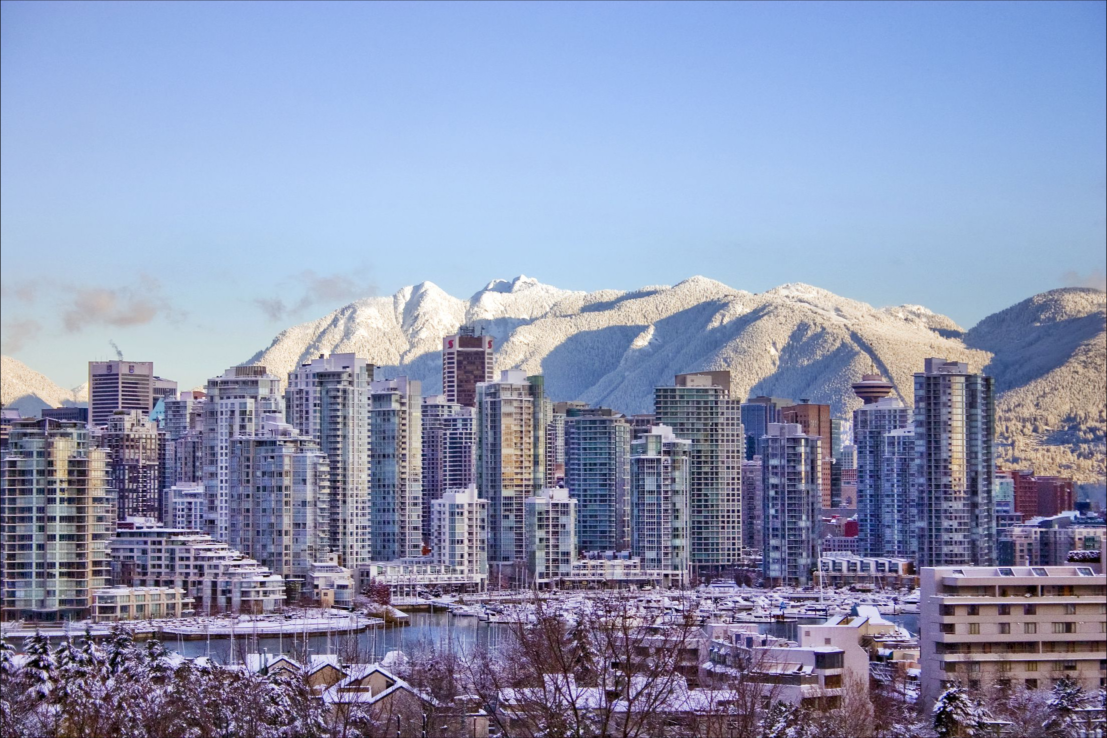

In [48]:
# The famous Afghan Girl (National Geographic, 1984)
# img = load("SharbatGula.jpg")
# or a scenic view of Vancouver?
img = load("Vancouver.jpg")

In [49]:
length(img)

3262700

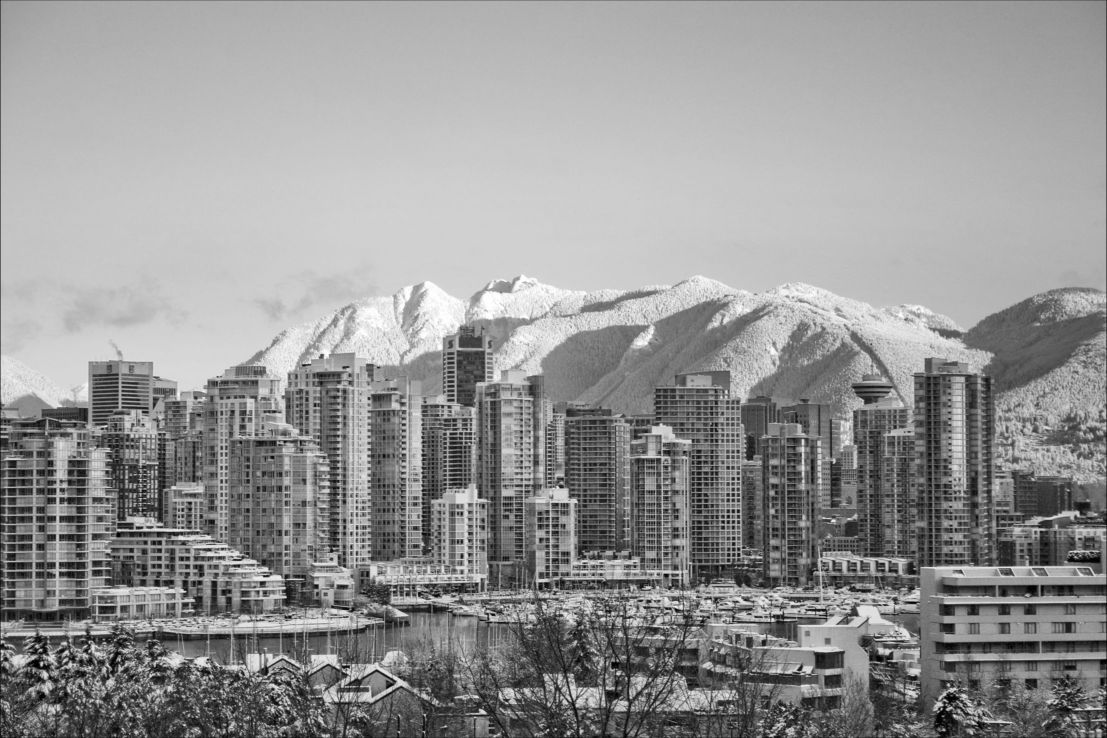

In [50]:
# convert to grayscale to make our life a little easier 
togray(c) = 0.3 * c.r + 0.59 * c.g + 0.11 * c.b
# togray_wrong(c) = (c.r + c.g + c.b) / 3
A = togray.(img)
Gray.(A)

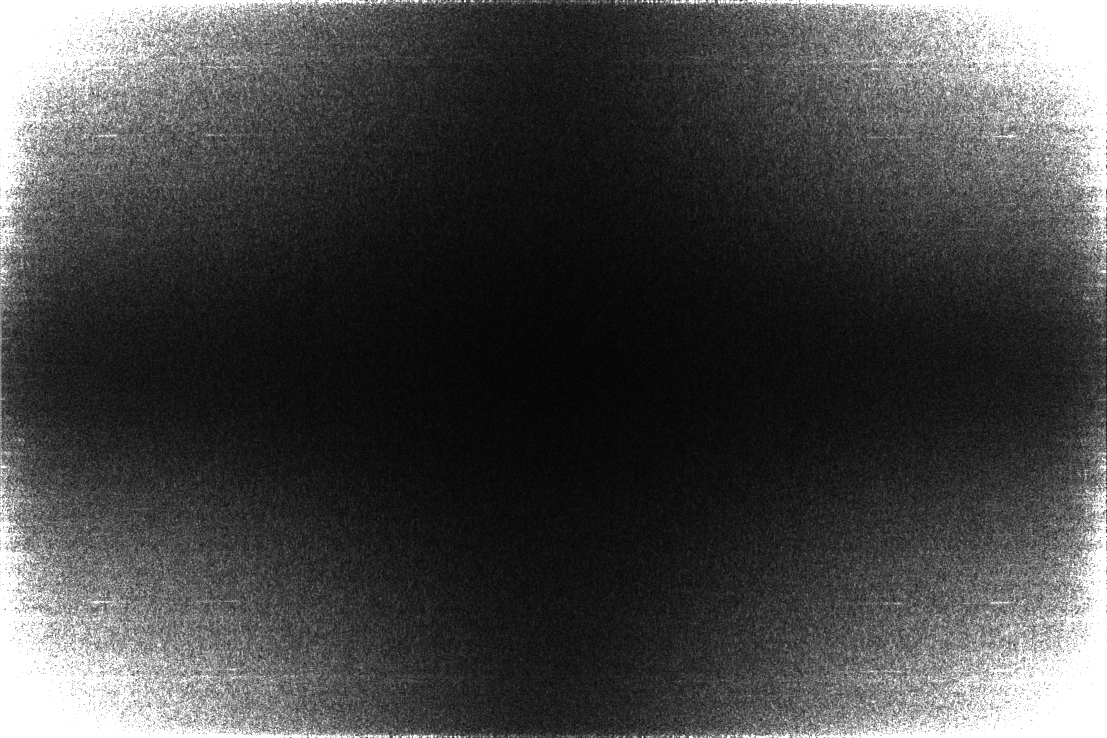

In [51]:
# fourier transform the grayscale image 
# and plot the transform: white => large coefficients 
Â = fft(A)
Gray.(abs.(Â)/300)

Retained 3.07809482943574% of Fourier modes


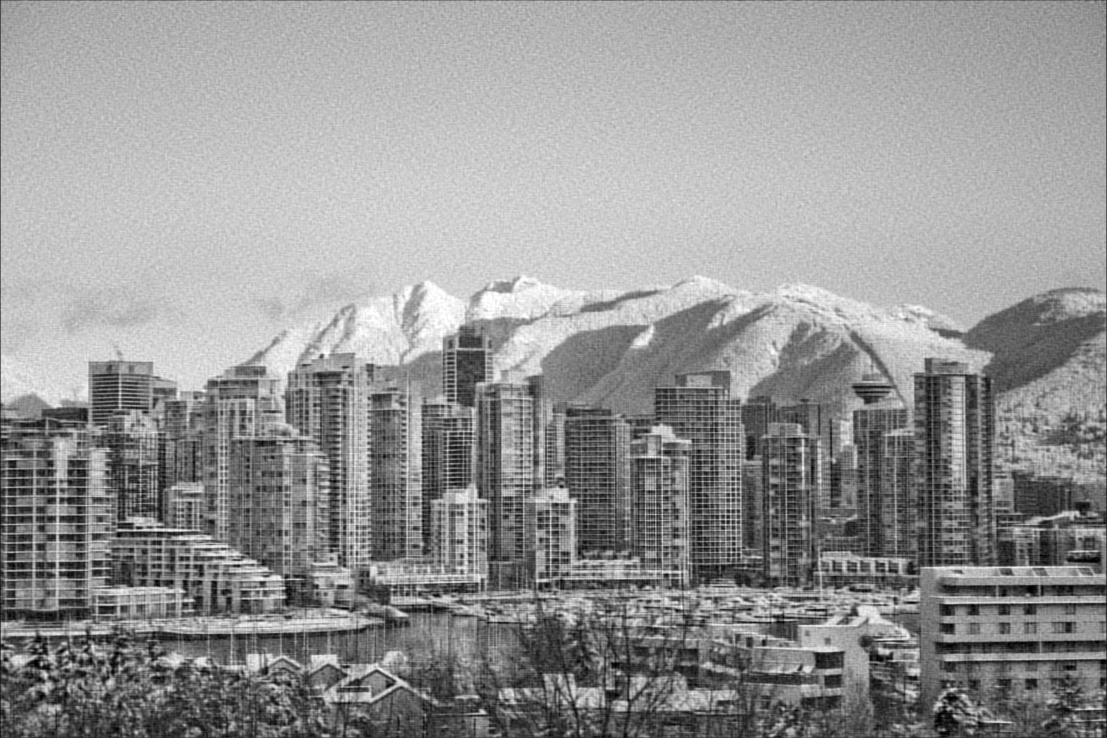

In [56]:
# truncate the coefficients at some threshold
B̂ = copy(Â)
thresh = 500.0 # 100, 200, 400 
B̂[ abs.(B̂) .< thresh ] .= 0.0 
# check how many coefficients we kept
ratio = 1 - length(findall(B̂ .== 0)) / length(B̂)
println("Retained $(ratio*100)% of Fourier modes")
# invert the Fourier transform and show the recovered image 
B = real.(ifft(B̂))
Gray.(B)